In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
#데이터셋 불러오기

mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) =  mnist.load_data()

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [19]:
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [23]:
#y_train, y_test 확인
for i in range(10):
    print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [24]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test= keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [26]:
#모델 만들기
shape_input = (28,28,1)
model = keras.Sequential([
    keras.Input(shape = shape_input),
    layers.Conv2D(32, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPool2D(pool_size = (2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation = 'softmax')
]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [27]:
batch_size = 128 
epochs = 15 

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 15s 34ms/step - loss: 0.3773 - accuracy: 0.8848 - val_loss: 0.0842 - val_accuracy: 0.9790
Epoch 2/15
422/422 [==============================] - 14s 34ms/step - loss: 0.1156 - accuracy: 0.9652 - val_loss: 0.0561 - val_accuracy: 0.9862
Epoch 3/15
422/422 [==============================] - 15s 34ms/step - loss: 0.0849 - accuracy: 0.9735 - val_loss: 0.0467 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0719 - accuracy: 0.9777 - val_loss: 0.0413 - val_accuracy: 0.9890
Epoch 5/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0623 - accuracy: 0.9802 - val_loss: 0.0394 - val_accuracy: 0.9903
Epoch 6/15
422/422 [==============================] - 14s 34ms/step - loss: 0.0538 - accuracy: 0.9832 - val_loss: 0.0386 - val_accuracy: 0.9912
Epoch 7/15
422/422 [==============================] - 15s 36ms/step - loss: 0.0520 - accuracy: 0.9833 - val_loss: 0.0353 - val_accuracy:

In [28]:
score = model.evaluate(x_test,y_test, verbose = 0)
print(score[0]) # loss 
print(score[1]) # acc

0.02589063160121441
0.991599977016449


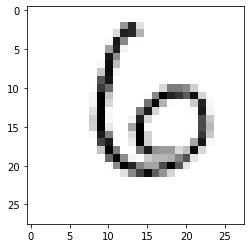

[6]


In [42]:
import matplotlib.pyplot as plt
number= 100
plt.imshow(x_test[number].reshape(28,28),cmap = 'Greys')
plt.show()

y_prob = model.predict(x_test[number].reshape(1,28,28,1))
predicted = y_prob.argmax(axis=-1)
print(predicted)